In [1]:
from sotip import *
import numpy as np
import scanpy as sc


In [20]:
adata = sc.read_h5ad('../simulation/cursor/simulation_heter_boundary.h5ad')


In [23]:
adata1 = adata[adata.obs['batch']=='0']

In [25]:
adata = adata1

In [30]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)



## set color

In [26]:
cmp = palettable.cartocolors.qualitative.Pastel_10.mpl_colors

In [27]:
adata.uns['gt_ct_colors'] = cmp

Trying to set attribute `._uns` of view, copying.


# ploting

In [33]:
np.unique(adata.obs['gt_ct'],return_counts=1)

(array(['group 1', 'group 2', 'group 5'], dtype=object),
 array([1000,  995, 1014]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


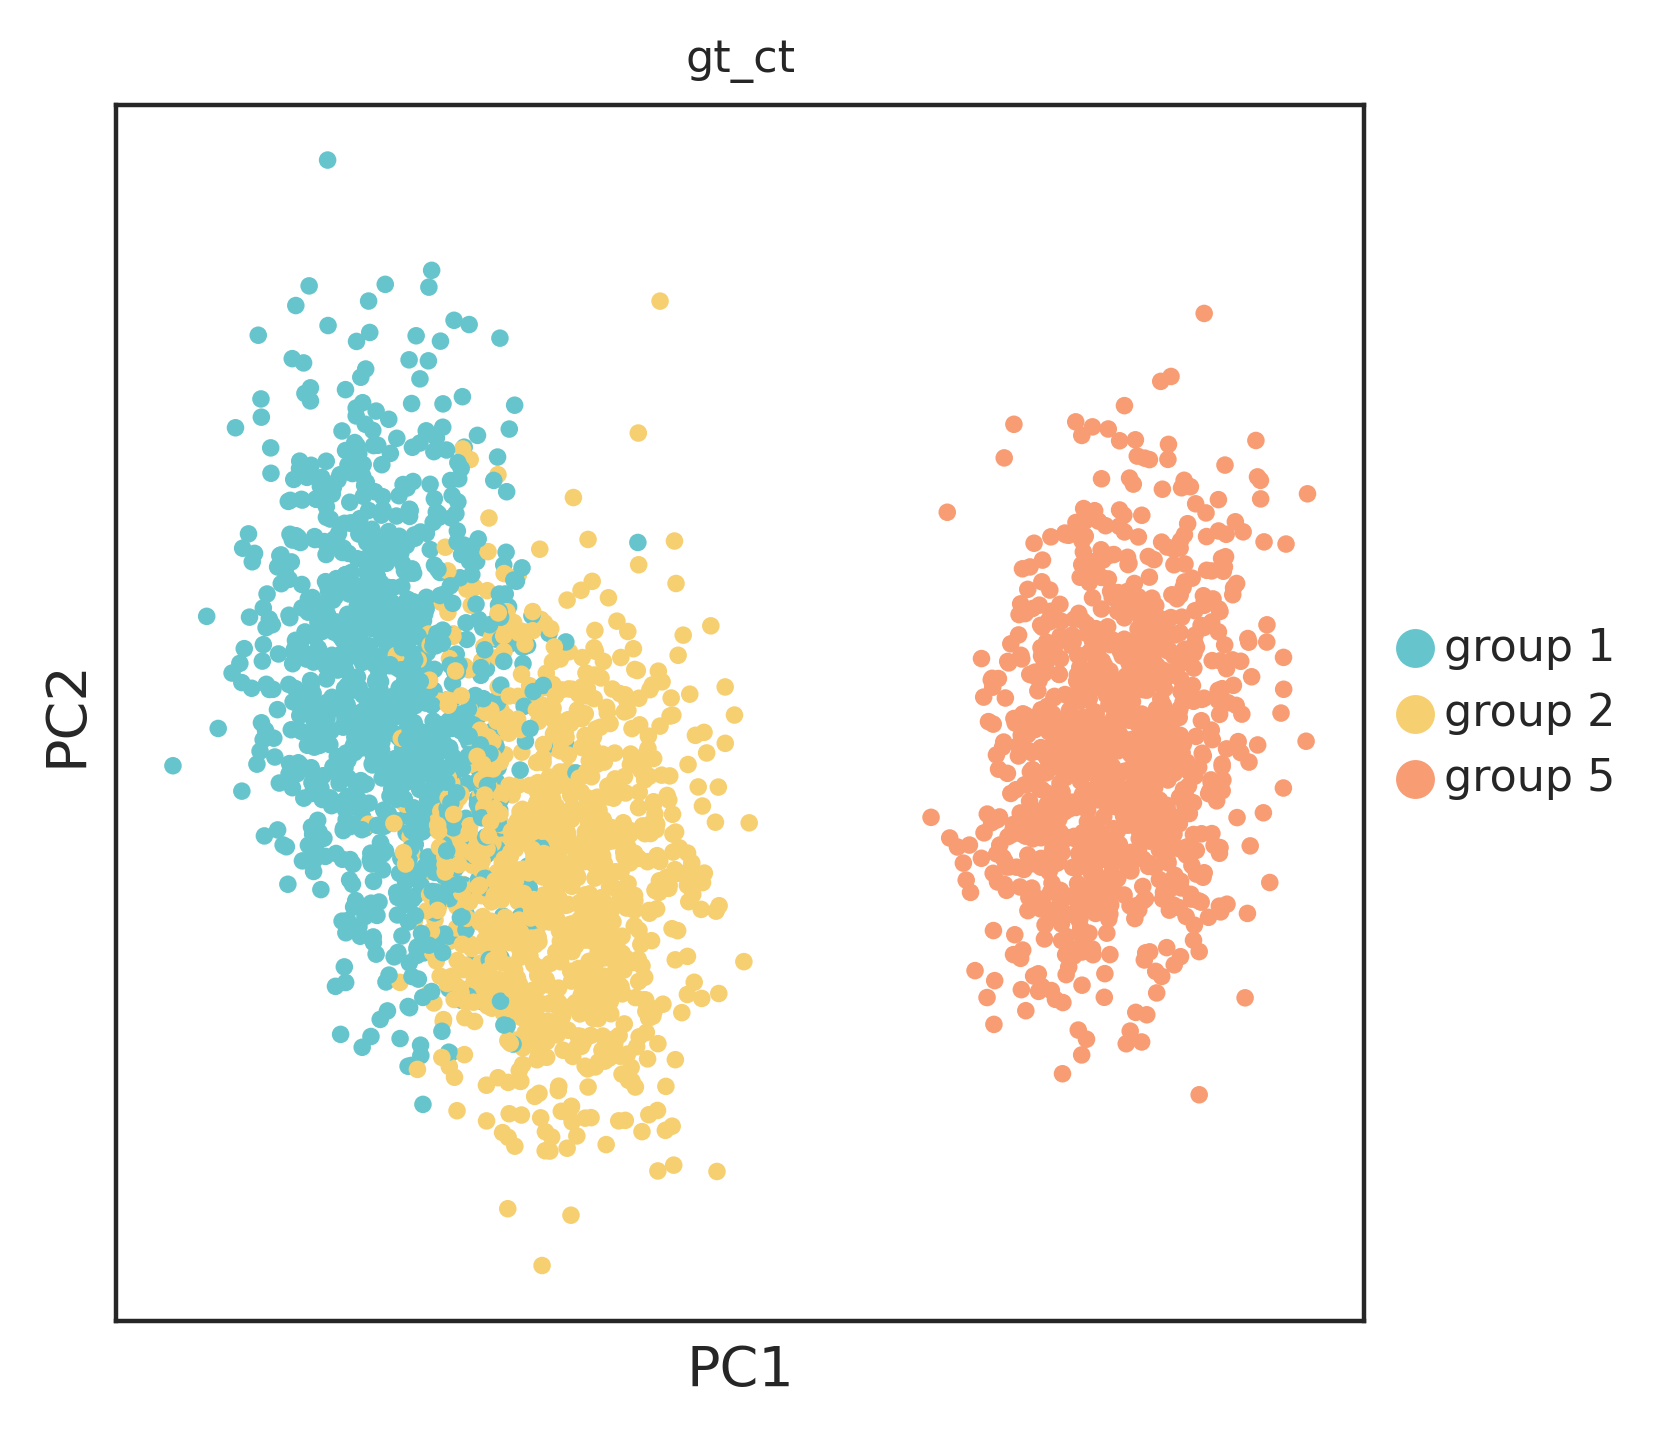

In [28]:
sc.pl.pca(adata,color='gt_ct')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


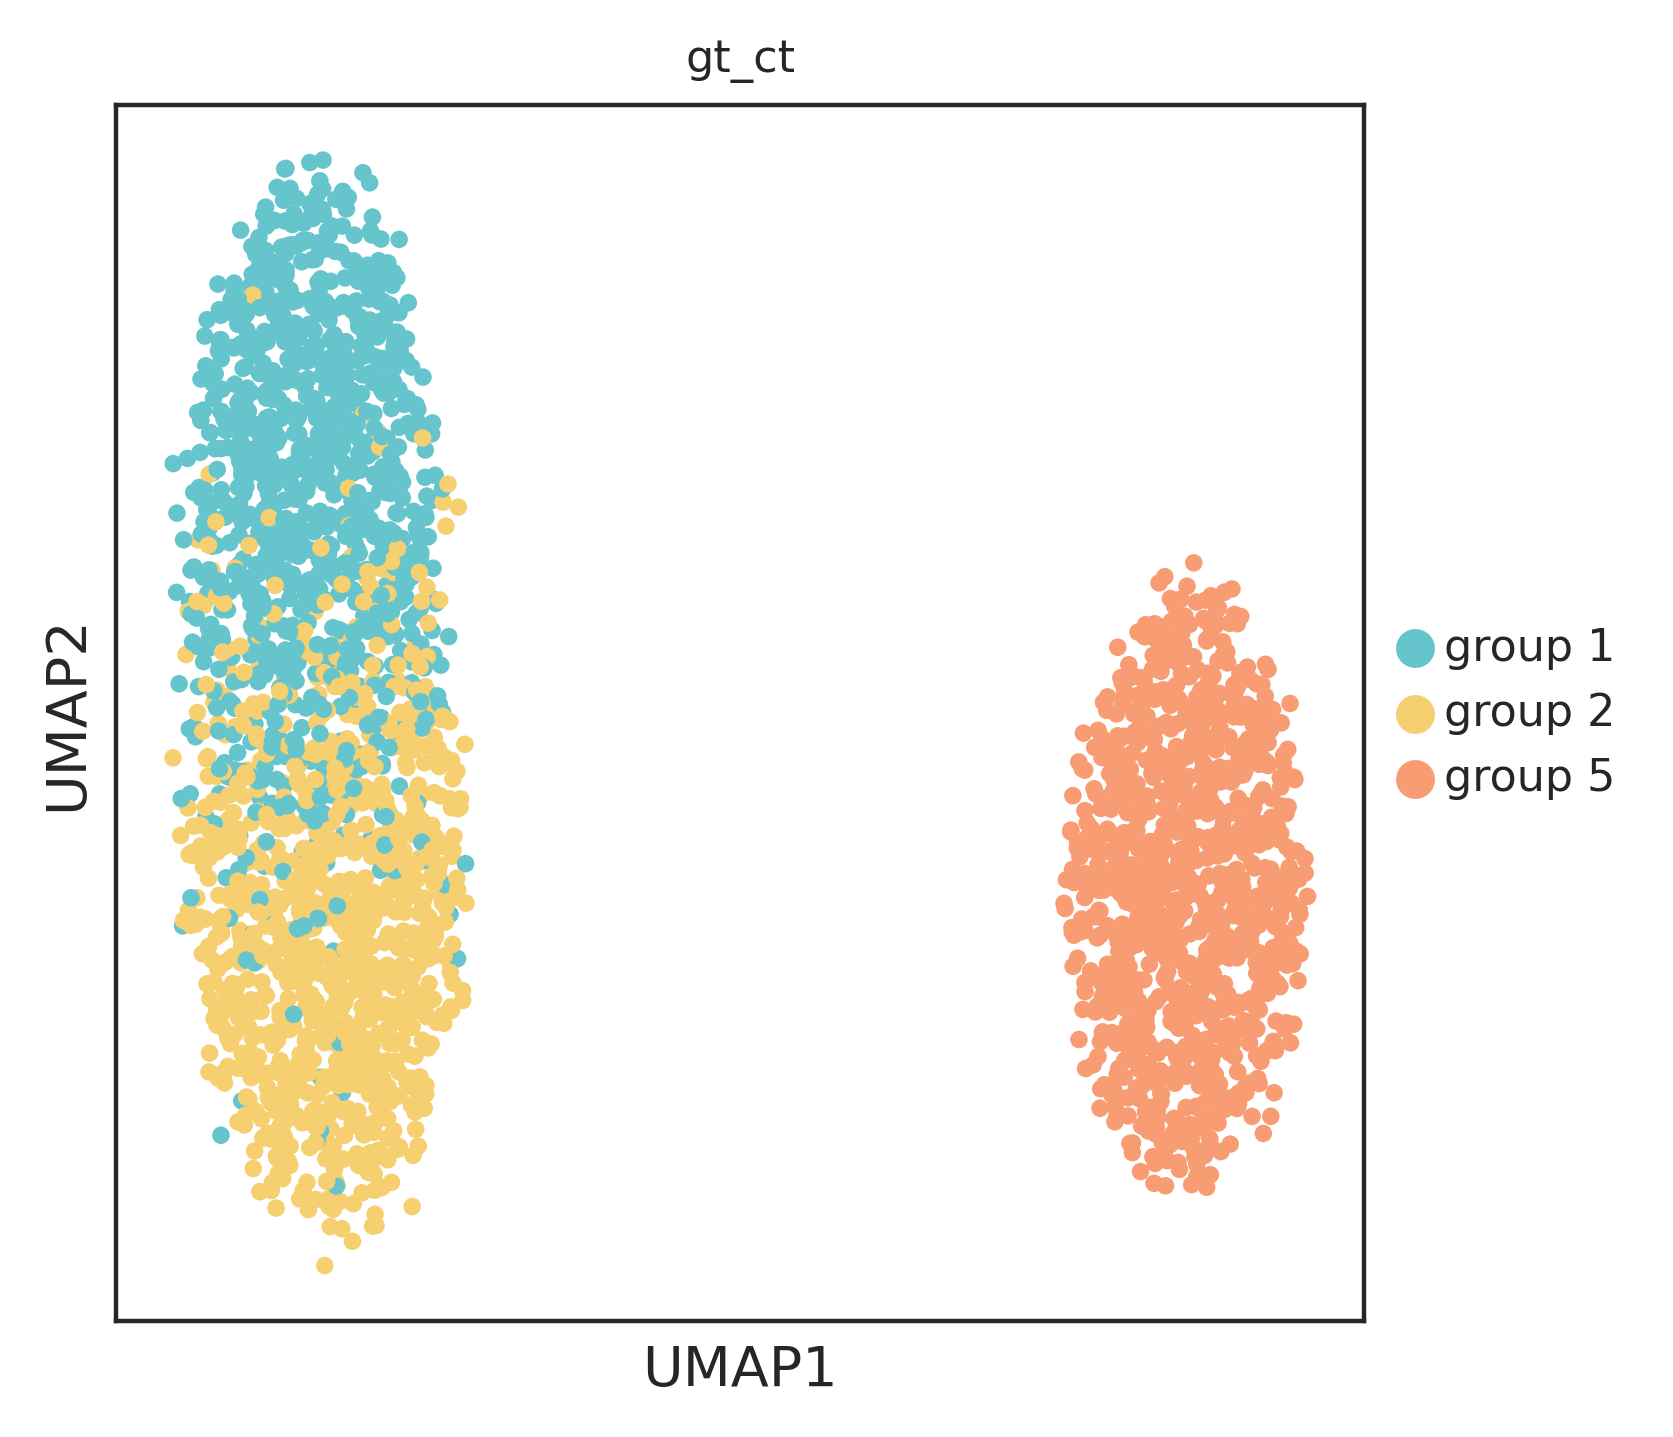

In [31]:
sc.pl.umap(adata,color='gt_ct')

In [14]:
def get_adata_by_order(order,adata_source):
    adata = adata_source.copy()
    order_ct = [f'group {i}' for i in order]
    spatial_mat = np.zeros(shape=(adata.shape[0],2))
    for i in range(len(order_ct)):
        ct = order_ct[i]
        cur_ct_id = np.where(adata.obs['gt_ct']==ct)[0]
        cur_num_cells = len(cur_ct_id)
        cur_spatial = random_spatial(cur_num_cells,[30*(i),30*(i+1)],[0,90])
        spatial_mat[cur_ct_id] = cur_spatial
        # region_array[cur_ct_id] =  
    adata.obsm['spatial'] = spatial_mat
    return adata

In [ ]:
adata1 = get_adata_by_order([1,2,5],adata)
adata2 = get_adata_by_order([1,5,2],adata)


In [30]:
adata1

AnnData object with n_obs × n_vars = 3009 × 1000
    obs: 'gt_ct'
    uns: 'pca', 'neighbors', 'umap', 'gt_ct_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


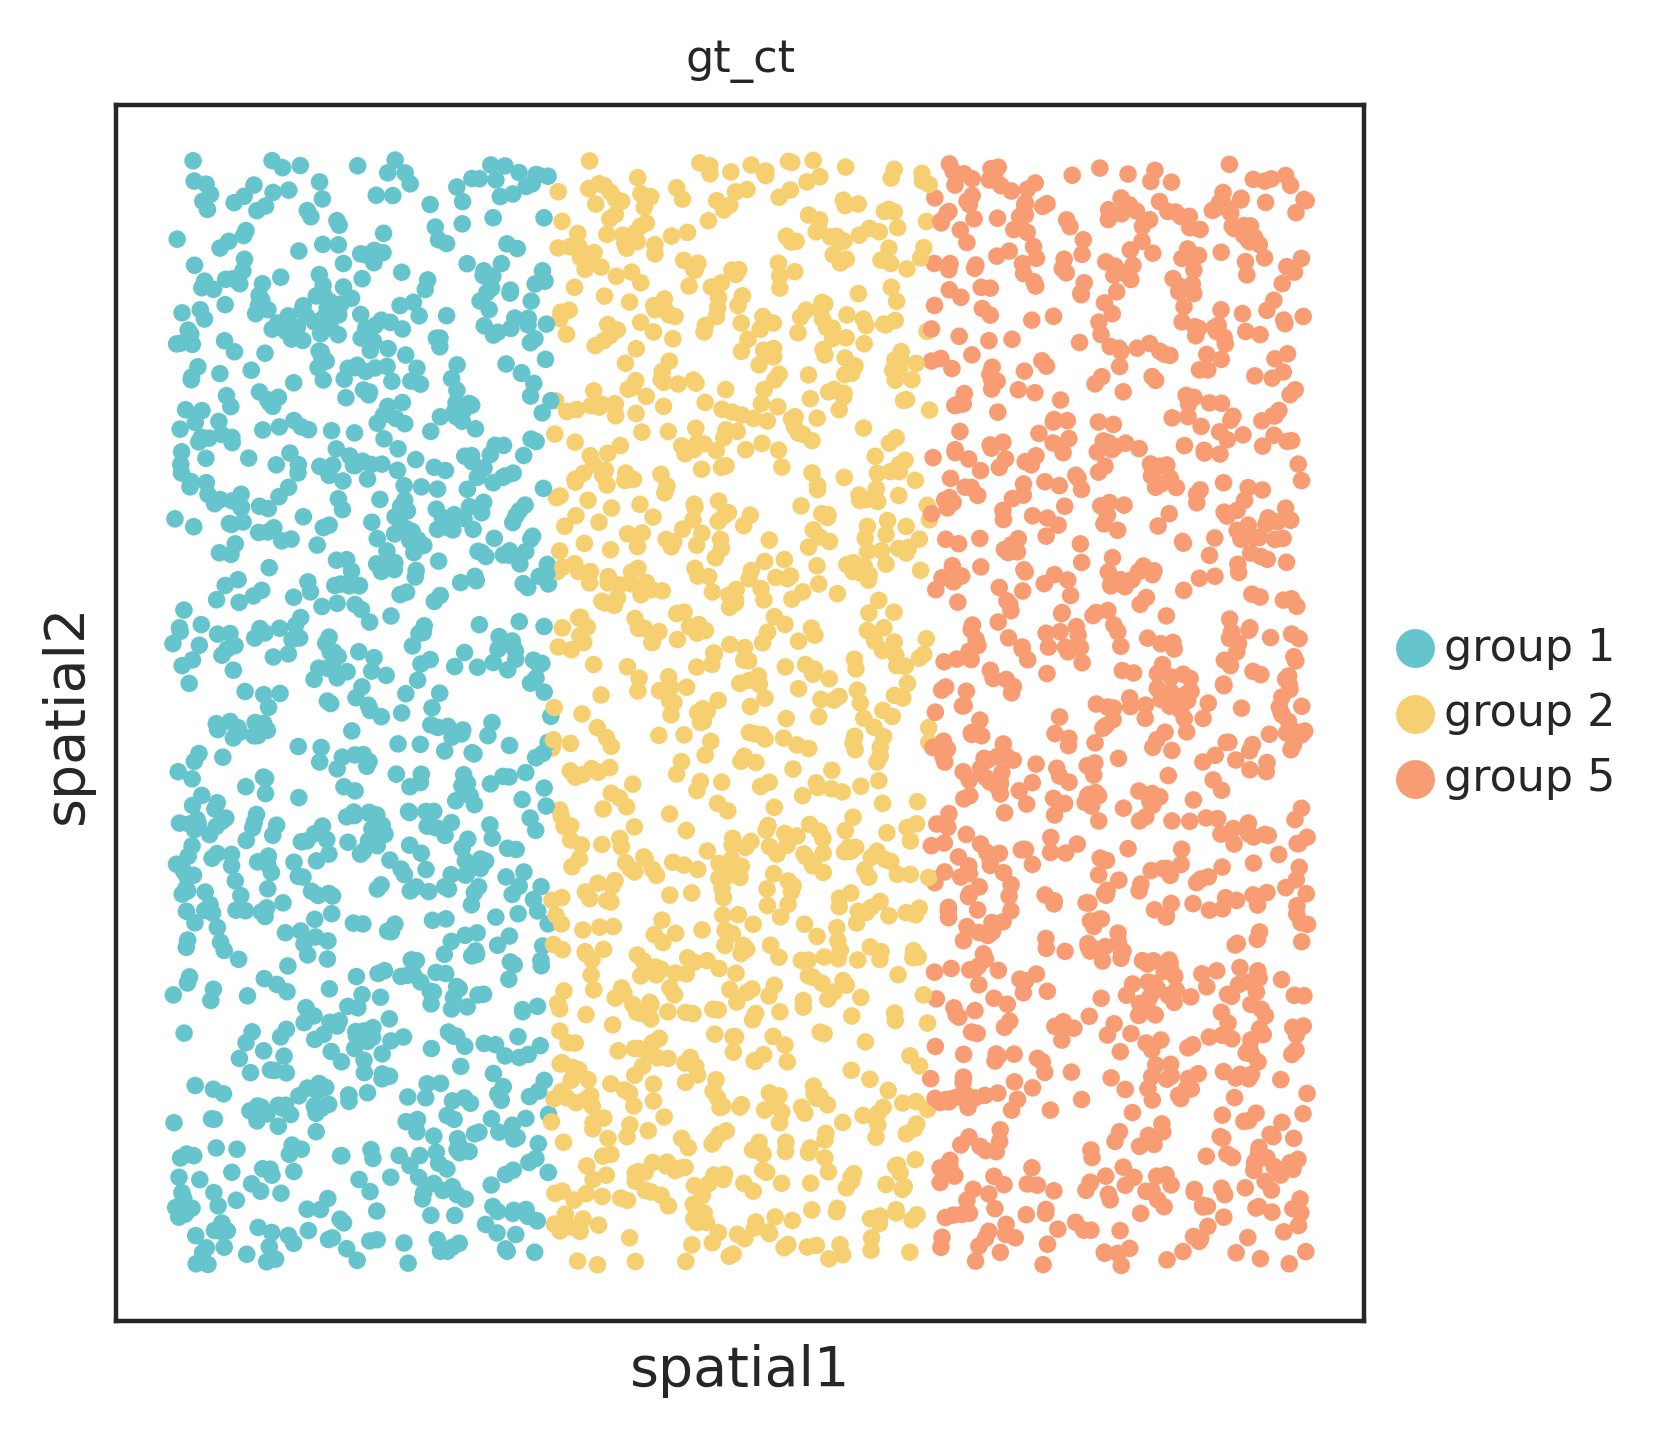

In [32]:
sc.pl.embedding(adata1,basis='spatial',color='gt_ct')

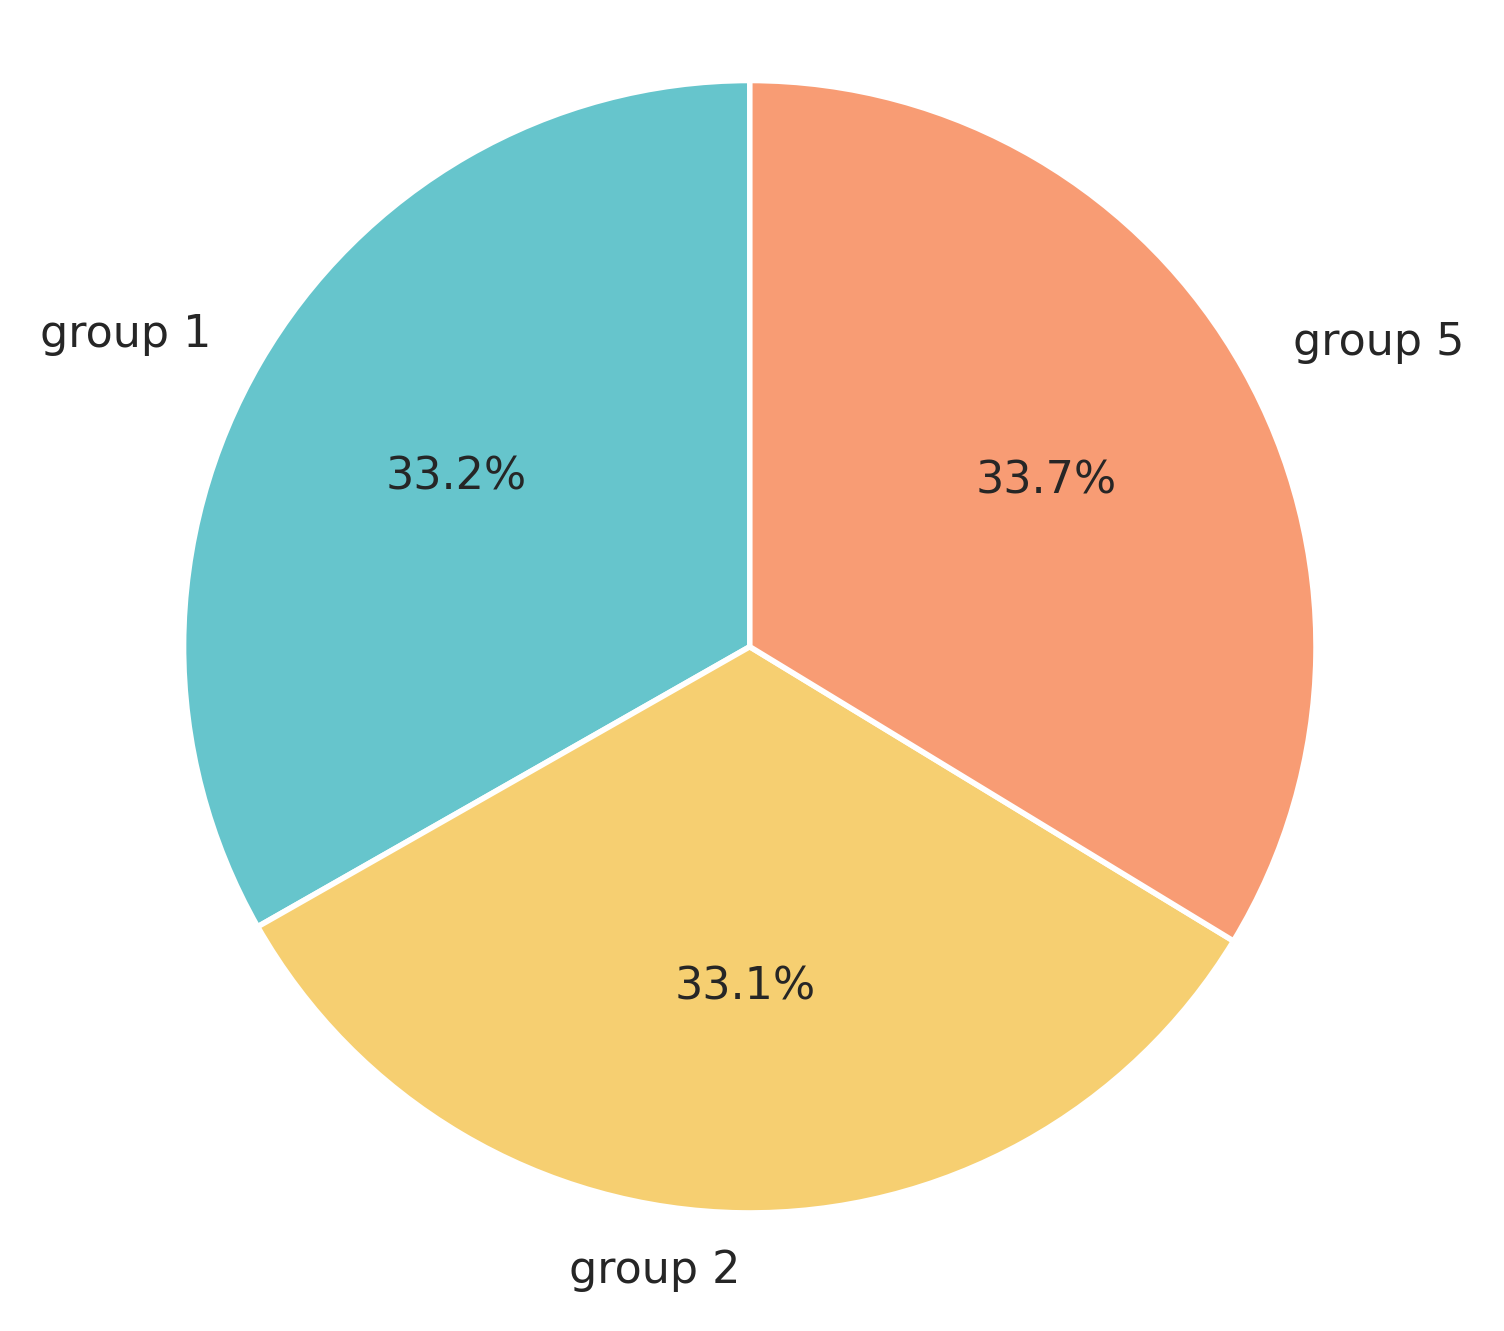

In [34]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.unique(adata.obs['gt_ct'],return_counts=1)[0]
sizes = np.unique(adata.obs['gt_ct'],return_counts=1)[1]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=adata.uns['gt_ct_colors'],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()